In [1]:
import sys
sys.path.insert(0, "../python")

from ionization import ionization
from ionization import adk
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

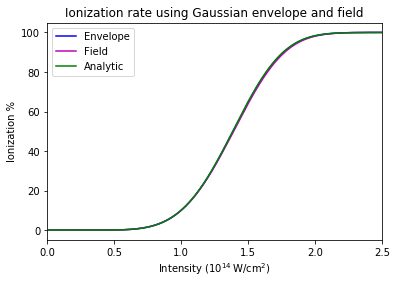

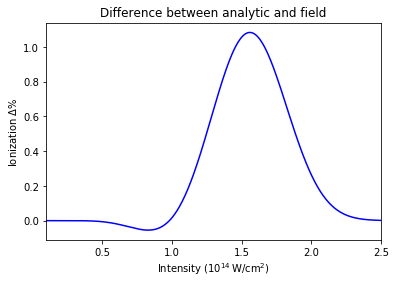

In [6]:
# Test multidimensional input to ionization fraction
I = np.arange(0.01, 20, .005)
t = np.arange(-200, 200, 1)
tau = 100
f = 3*10**-1

def ionization_plot(EI, I, t, f, tau, Z, chirp=0):
    IN = np.size(I)
    env = np.zeros(IN)
    fld = np.zeros(IN)
    for x in range(0, IN):
        Eenv = abs(ionization.gaussian_envelope(I[x], t, tau))
        Efld = abs(ionization.gaussian_field(I[x], t, f, tau).real)
        env[x] = adk.ionization_frac(EI, Eenv, t, Z, 0, 0, True)*100
        fld[x] = adk.ionization_frac(EI, Efld, t, Z, 0, 0, False)*100
    E = ionization.field_from_intensity(I)
    anl = adk.gaussian_frac(EI, E, tau, Z)*100
    return [env, fld, anl]

H = ionization_plot(13.5984, I, t, f, tau, 1)

plt.plot(I, H[0], 'b-',I, H[1], 'm-', I, H[2], 'g-')
plt.ylabel('Ionization %')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Ionization rate using Gaussian envelope and field')
plt.legend(['Envelope', 'Field', 'Analytic'])
plt.xlim([0, 2.5])
plt.show()

plt.plot(I, H[2]-H[1], 'b-')
plt.ylabel(r'Ionization $\Delta$%')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Difference between analytic and field')
plt.xlim([0.1, 2.5])
plt.show()

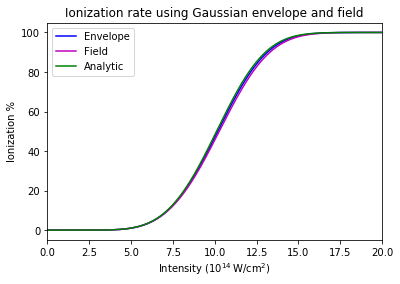

In [3]:
He = ionization_plot(24.5874, I, t, f, tau, 1)

plt.plot(I, He[0], 'b-',I, He[1], 'm-', I, He[2], 'g-')
plt.ylabel('Ionization %')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Ionization rate using Gaussian envelope and field')
plt.legend(['Envelope', 'Field', 'Analytic'])
plt.xlim([0, 20])
plt.show()

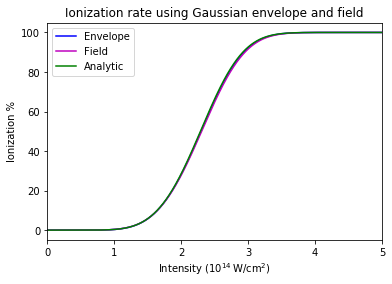

In [4]:
Ar = ionization_plot(15.7596, I, t, f, tau, 1)

plt.plot(I, Ar[0], 'b-',I, Ar[1], 'm-', I, Ar[2], 'g-')
plt.ylabel('Ionization %')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Ionization rate using Gaussian envelope and field')
plt.legend(['Envelope', 'Field', 'Analytic'])
plt.xlim([0, 5])
plt.show()

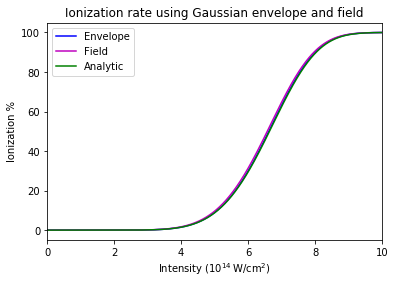

In [5]:
Ar2 = ionization_plot(27.62965, I, t, f, tau, 2)

plt.plot(I, Ar2[0], 'b-',I, Ar2[1], 'm-', I, Ar2[2], 'g-')
plt.ylabel('Ionization %')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Ionization rate using Gaussian envelope and field')
plt.legend(['Envelope', 'Field', 'Analytic'])
plt.xlim([0, 10])
plt.show()